# Overview
### 1) Understanding the shape of the data
### 2) Data cleaning

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")
dataset.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [56]:
dataset.shape
# dataset.age.value_counts()

(299, 13)

In [57]:
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [58]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [59]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [60]:
dataset.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

In [61]:
dataset_numerical = dataset[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
                              'ejection_fraction', 'high_blood_pressure', 'platelets',
                             'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
                             ]]


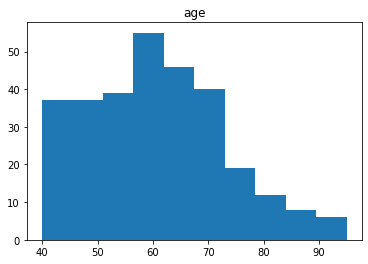

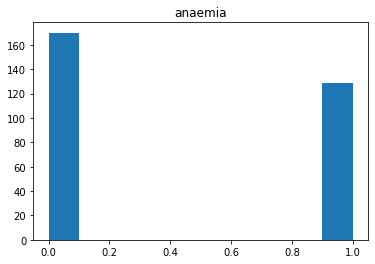

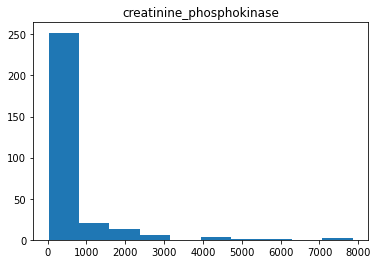

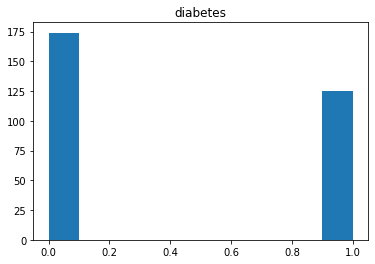

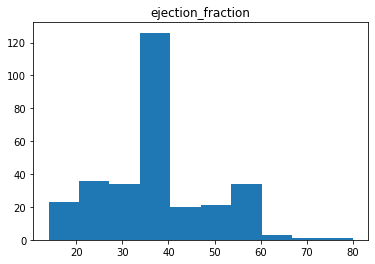

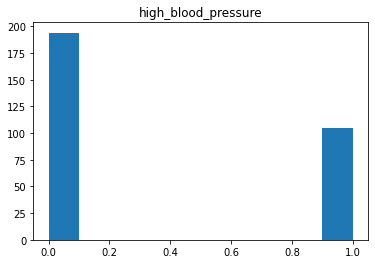

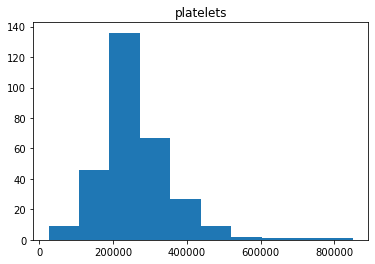

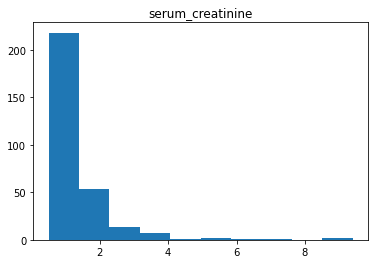

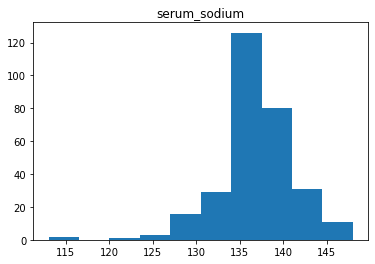

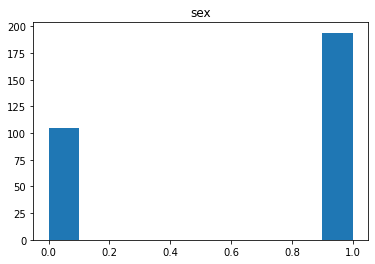

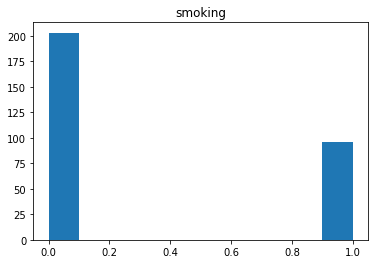

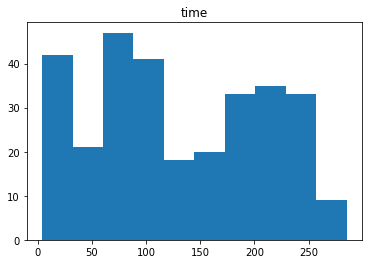

In [62]:
for i in dataset_numerical:
    plt.hist(dataset_numerical[i])
    plt.title(i)
    plt.show()

In [63]:
print(dataset_numerical.corr())

                               age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   

                          diabetes  e

In [64]:
dataset.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

<AxesSubplot:>

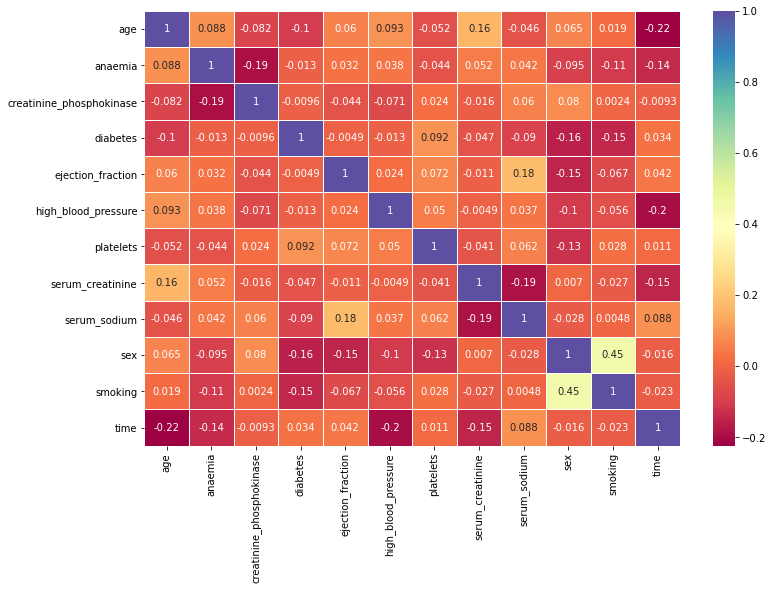

In [65]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset_numerical.corr(),cmap="Spectral",annot=True,linewidths=0.5)
#correlation less

In [66]:
pd.pivot_table(dataset, index='DEATH_EVENT', values=['age', 'anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'])

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


# Outlier Detection

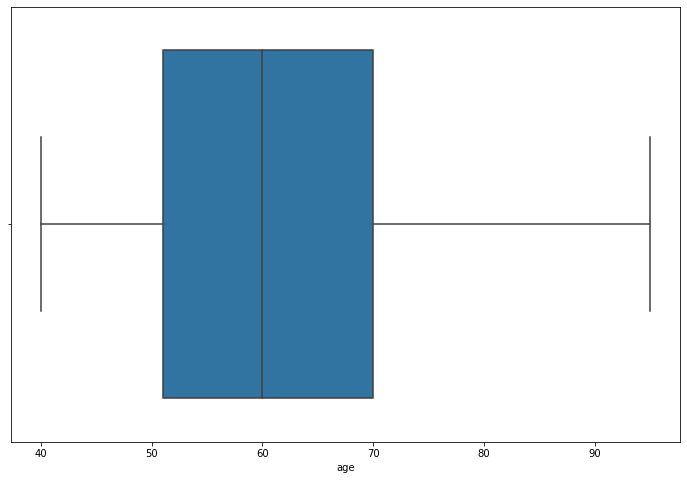

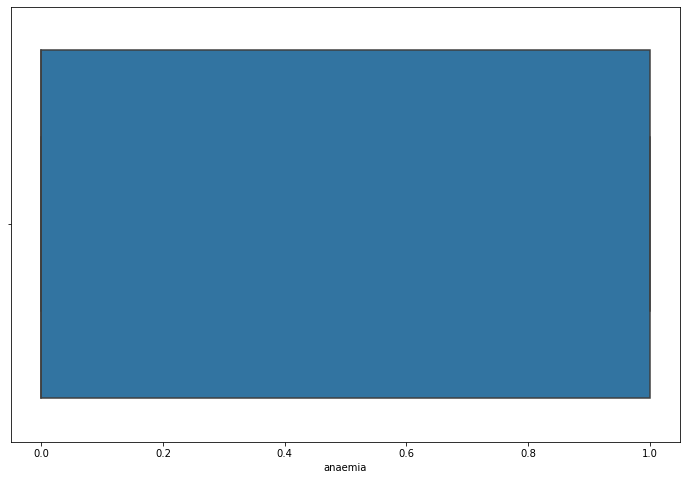

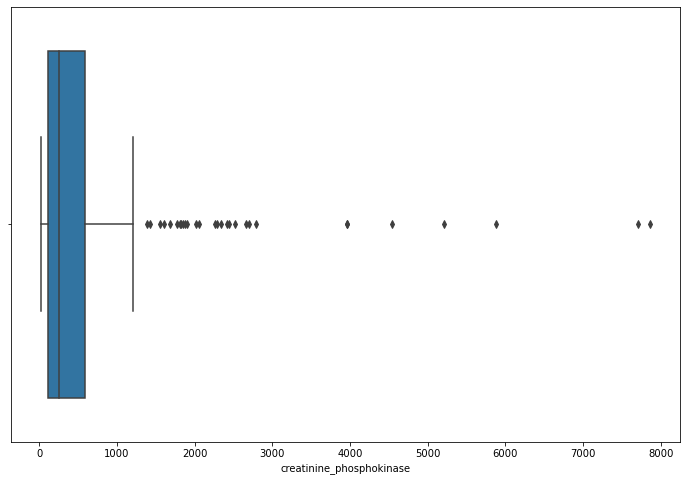

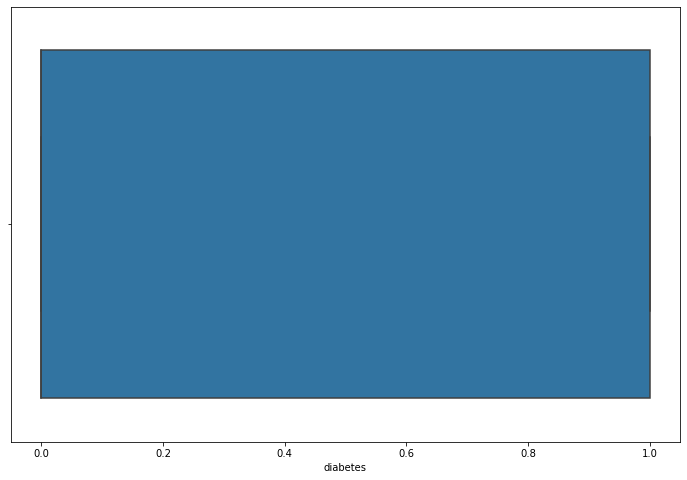

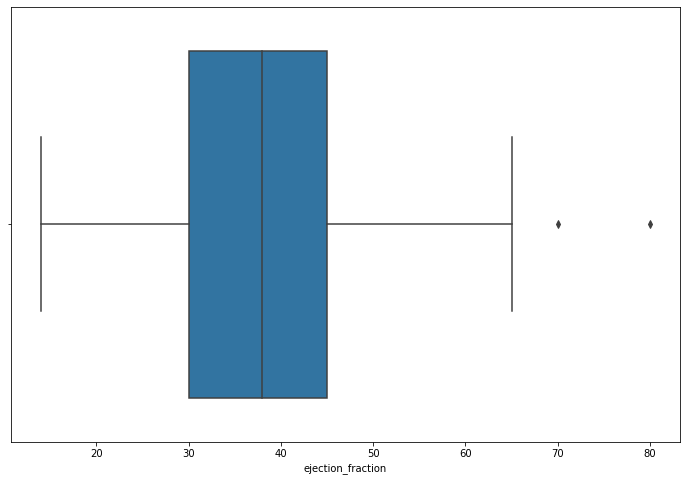

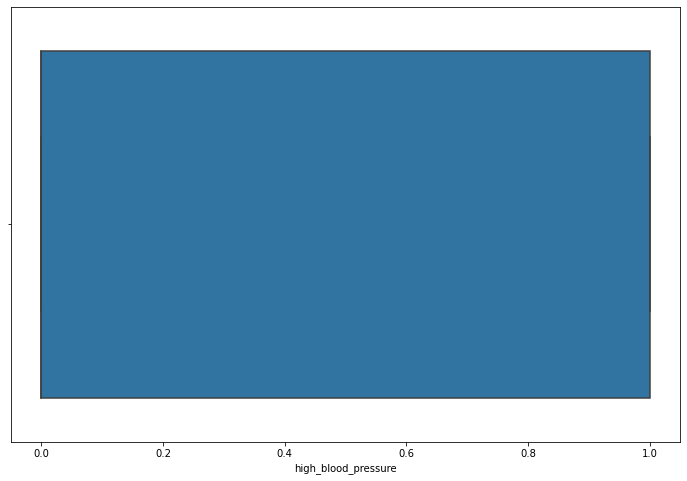

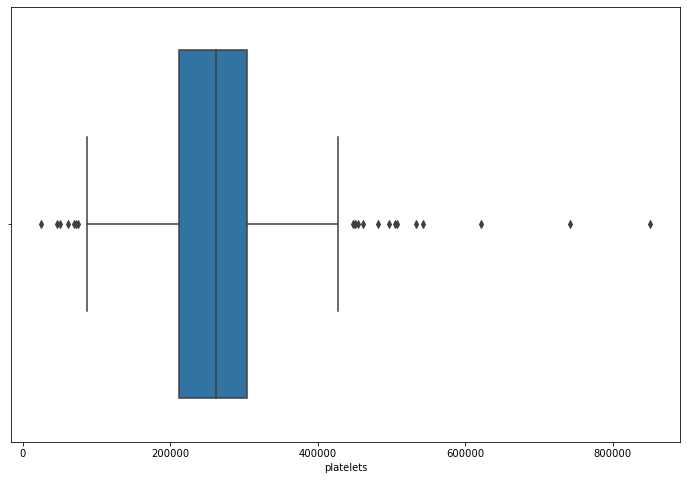

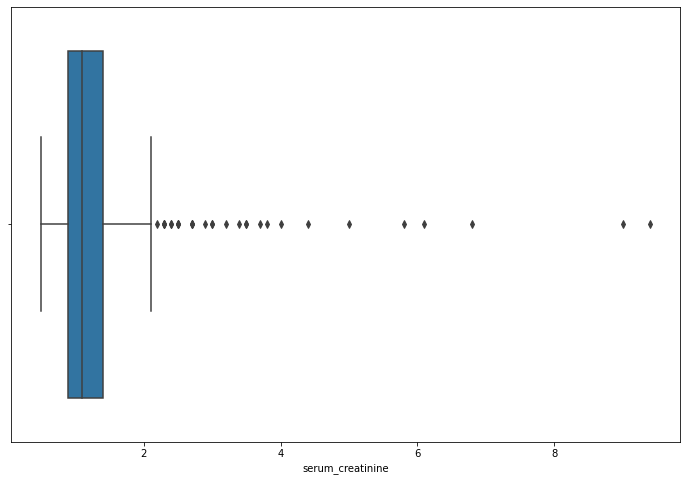

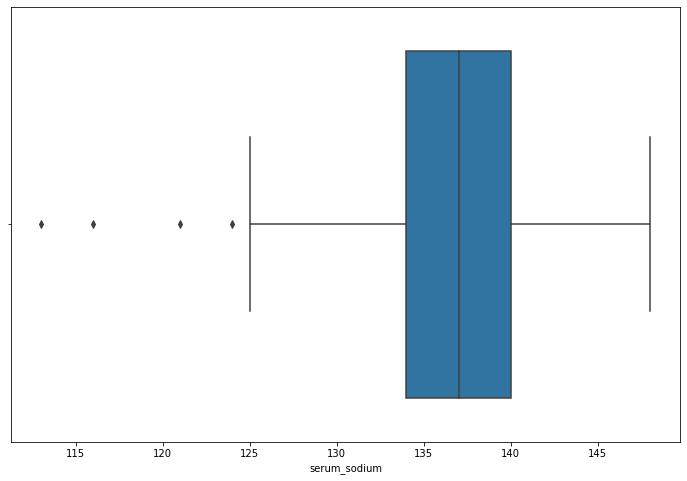

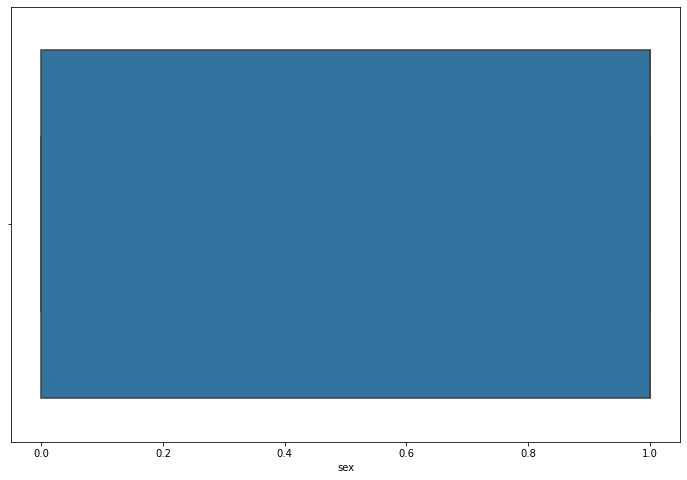

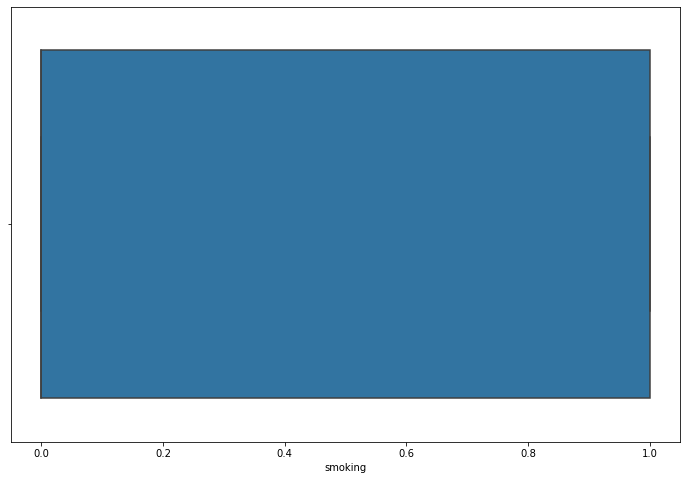

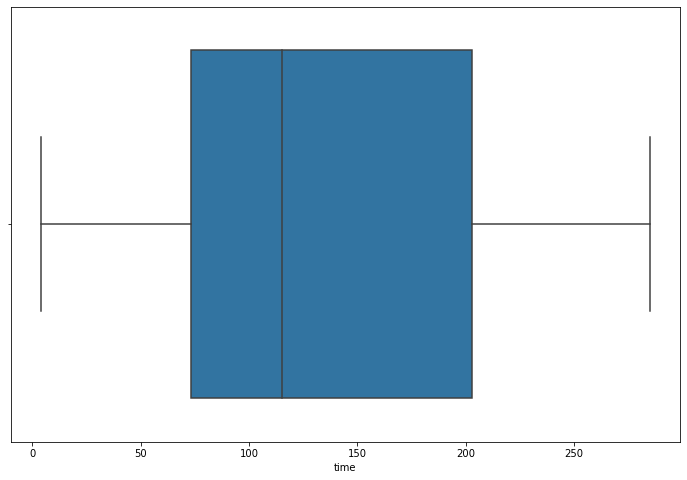

In [67]:
for i in dataset_numerical:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=dataset_numerical[i])
    plt.show()


In [68]:
def outliers(dataset_out,drop=False):
    for each_feature in dataset_out.columns:
        feature_data=dataset_out[each_feature]
        Q1=np.percentile(feature_data,25.)
        Q3=np.percentile(feature_data,75.)
        IQR=Q3-Q1
        outlier_step=IQR*1.5
        outliers=feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print(f"For the feature {each_feature}, No of outliers {len(outliers)}")
        else:
            dataset.drop(outliers,inplace=True,errors='ignore')

outliers(dataset[['creatinine_phosphokinase',
         'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']])

For the feature creatinine_phosphokinase, No of outliers 29
For the feature ejection_fraction, No of outliers 2
For the feature platelets, No of outliers 21
For the feature serum_sodium, No of outliers 4
For the feature serum_creatinine, No of outliers 29


here we are losing a lot of data

In [69]:
outline_free_df=dataset.copy()
outline_free_df[['creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']]=np.log(outline_free_df[['creatinine_phosphokinase',
         'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']])
outliers(outline_free_df[['creatinine_phosphokinase',
         'ejection_fraction', 'platelets', 'serum_sodium','serum_creatinine']],drop=True) 

In [70]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,60.733853,0.437984,523.186047,0.406977,38.310078,0.372093,263906.498682,1.171202,137.096899,0.655039,0.329457,133.558140,0.279070
std,11.839712,0.497103,770.259073,0.492225,11.441136,0.484302,73866.659002,0.404008,3.627917,0.476280,0.470930,75.870708,0.449414
min,40.000000,0.000000,30.000000,0.000000,17.000000,0.000000,126000.000000,0.500000,126.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.750000,0.000000,30.000000,0.000000,219250.000000,0.900000,135.000000,0.000000,0.000000,77.250000,0.000000
50%,60.000000,0.000000,238.500000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,69.750000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.300000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,5882.000000,1.000000,80.000000,1.000000,504000.000000,2.700000,148.000000,1.000000,1.000000,285.000000,1.000000


### Normalizing the data

In [76]:

normalized_data=dataset.copy()
normalized_data=(normalized_data-normalized_data.min())/(normalized_data.max()-normalized_data.min())
normalized_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.094327,0.0,0.047619,1.0,0.367725,0.636364,0.181818,1.0,0.0,0.000000,1.0
2,0.454545,0.0,0.019822,0.0,0.047619,0.0,0.095238,0.363636,0.136364,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.013841,0.0,0.047619,0.0,0.222222,0.636364,0.500000,1.0,0.0,0.010676,1.0
5,0.909091,1.0,0.002905,0.0,0.365079,1.0,0.206349,0.727273,0.272727,1.0,1.0,0.014235,1.0
7,0.363636,1.0,0.048701,1.0,0.682540,0.0,0.867725,0.272727,0.227273,1.0,1.0,0.021352,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.418182,1.0,0.012474,1.0,0.285714,0.0,0.140212,0.181818,0.454545,1.0,1.0,0.946619,0.0
294,0.400000,0.0,0.005297,1.0,0.333333,1.0,0.076720,0.272727,0.772727,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.305878,0.0,0.333333,0.0,0.380952,0.318182,0.590909,0.0,0.0,0.950178,0.0
297,0.090909,0.0,0.407211,0.0,0.333333,0.0,0.037037,0.409091,0.636364,1.0,1.0,0.982206,0.0
